In [2]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
np.random.seed(13)

# Dataset

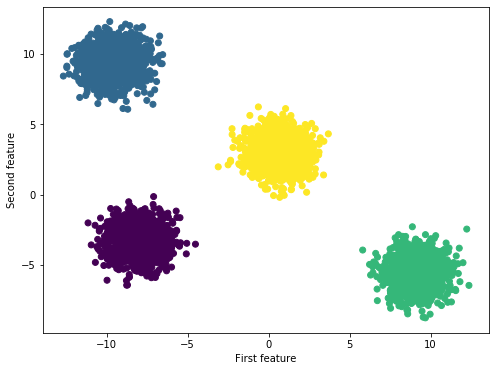

In [4]:
X, y_true = make_blobs(centers=4, n_samples=5000)
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y_true)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [9]:
y_true.shape

(5000,)

In [10]:
y_true = y_true[:,np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X,y_true)
print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (3750, 2)
Shape y_train: (3750, 1)
Shape X_test: (1250, 2)
Shape y_test: (1250, 1)


# Softmax regression class

In [41]:
class SoftmaxRegressor:
    def __init__(self):
        pass
    def train(self,X,y_true,n_classes,n_iters=10,learning_rate=0.1):
        self.n_samples, n_features = X.shape
        self.n_classes = n_classes
        #1、初始化
        self.weights = np.random.rand(self.n_classes,n_features)
        self.bias = np.zeros((1,self.n_classes))
        all_losses = []
        
        for i in range(n_iters):
            #2、计算预测的y
            #score = wx+b
            scores = self.compute_scores(X)
            #probs = softmax(score)
            probs = self.softmax(scores)
            y_predict = np.argmax(probs,axis=1)[:,np.newaxis]
            #以上三步就是def predict
            y_one_hot = self.one_hot(y_true)
            
            #3、计算loss
            loss = self.cross_entropy(y_one_hot,probs)
            all_losses.append(loss)
            
            #4、计算梯度
            dw = (1 / self.n_samples) * np.dot(X.T , (probs - y_one_hot))
            db = (1 / self.n_samples) * np.sum(probs - y_one_hot, axis=0)
            
            #5、更新参数
            self.weights -= learning_rate * dw.T
            self.bias -= learning_rate * db
            
            if i % 100 == 0:
                print(f'Iteration number:{i},loss:{np.round(loss,4)}')
        return self.weights,self.bias,all_losses
    def predict(self,X):
        scores = self.compute_scores(X)
        probs = self.softmax(scores)
        return np.argmax(probs,axis=1)[:,np.newaxis]
    def softmax(self,scores):
        exp = np.exp(scores)
        sum_exp = np.sum(np.exp(scores), axis=1, keepdims=True)
        softmax = exp / sum_exp
        
        return softmax
    def compute_scores(self,X):
        return np.dot(X,self.weights.T) + self.bias
    
    def cross_entropy(self,y_true,probs):
        loss = - (1 / self.n_samples) * np.sum(y_true * np.log(probs))
        return loss
    def one_hot(self,y):
        one_hot = np.zeros((self.n_samples, self.n_classes))
        one_hot[np.arange(self.n_samples), y.T] = 1
        return one_hot

# Initializing and training the model

Iteration number:0,loss:1.545
Iteration number:100,loss:0.0383
Iteration number:200,loss:0.0246
Iteration number:300,loss:0.0191
Iteration number:400,loss:0.0159
Iteration number:500,loss:0.0139
Iteration number:600,loss:0.0124
Iteration number:700,loss:0.0113


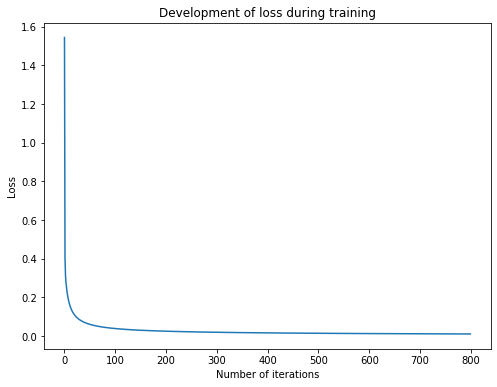

In [42]:
regressor = SoftmaxRegressor()
w_trained, b_trained, loss = regressor.train(X_train,y_train,learning_rate=.1,n_iters=800,n_classes=4)
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(800),loss)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

# Testing the model

In [43]:
n_test_samples, _ = X_test.shape
y_predict = regressor.predict(X_test)
print(f"Classification accuracy on test set: {(np.sum(y_predict == y_test)/n_test_samples) * 100}%")

Classification accuracy on test set: 31360.160000000003%
